# Assignment 2 - Question 3: Tree-based Models 
**Course Name:** Machine Learning (DDA3020)

(30 points in total)

<font color=Red>*Please enter your personal information (Double-click this block first)*</font>

**Name:** 高婧雯

**Student ID:** 123090121

### Overview

In this question, you will use three tree-based models (Decision Tree, Bagging, and Random Forest) to solve a real problem, image classification. The tasks includes training models by different parameters, comparing the results of different models, and trying to find the best parameter combination. As a part of an assignment, your task is to **run all codes in this script and complete the parts marked with** <font color=Red>\[TASK\]</font>.

### Dataset Introduction

Since we will use a same dataset for both question 3 & 4, it's important to have an overall knowledge of this dataset. The dataset is called **Fashion-MNIST**, a member of the MNIST family, but I think it's more interesting. This dataset is an image classification task with ten categories, all of which are items from our daily lives. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image. It means that we can use 784 numbers (in the range of 0~255) to represent one image. More details can be found in https://github.com/zalandoresearch/fashion-mnist.

OK. Now it's time to start, please read and run each block of codes in order, so that you will have a smooth experience.

In [1]:
import numpy as np
import gzip
import random
import os
import pandas as pd
import matplotlib.pyplot as plt

# Please do not modify the seed number here.
np.random.seed(336)

Don't need to carefully read this block since it's just loading the dataset. Just run it.

In [2]:
def load_mnist(path, kind, subset=None):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'%kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'%kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    
    if subset is not None:
        selected_images, selected_labels = [], []
        for label in range(10):
            indices = np.where(labels == label)[0]
            selected_indices = np.random.choice(indices, subset, replace=False)
            selected_images.append(images[selected_indices])
            selected_labels.append(labels[selected_indices])
        images = np.concatenate(selected_images, axis=0)
        labels = np.concatenate(selected_labels, axis=0)

        paired = list(zip(images, labels))
        random.shuffle(paired)
        images, labels = zip(*paired)
    
    return np.array(images), np.array(labels)

In this question, we only use a subset of Fashion-MNIST dataset to reduce compuration time.

In [20]:
X_train, y_train = load_mnist('./data/', kind='train', subset=100)
X_test, y_test = load_mnist('./data/', kind='t10k', subset=20)

You can repeat running this block for several times to see different images with its label in this dataset.

The label index of this image is: 9
The label name of this graph is: Ankle boot


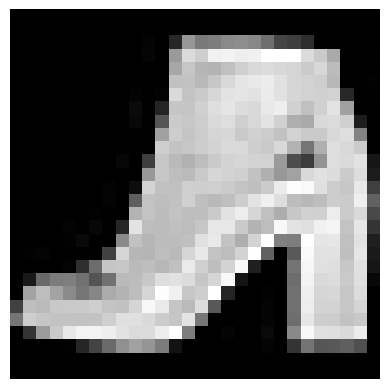

In [310]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
idx = random.choice(range(0,len(X_test)))
print(f"The label index of this image is: {y_test[idx]}")
print(f"The label name of this graph is: {label_names[y_test[idx]]}")

plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In this question, we use each pixel to represent different features of a data sample. It means that each sample will have 784 features to learn and 1 label to predict. The advantage is that you don't need to struggle on data processing but focus on training models and analyzing results.

In [5]:
X_train = pd.DataFrame(X_train, columns=[f"pixel_{i}" for i in range(X_train.shape[1])])
X_test = pd.DataFrame(X_test, columns=[f"pixel_{i}" for i in range(X_test.shape[1])])

In both question 3 & 4, we only use one metric, **accuracy_score**. Here is a simple example about how to use this function from sklearn.

In [6]:
from sklearn.metrics import accuracy_score
_y_true = [0,1,1,2,0]
_y_pred = [1,1,2,2,0]
accuracy_score(_y_true, _y_pred)

0.6

### Task 1
Write code to train Decision Tree Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_dt and test_acc_dt. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

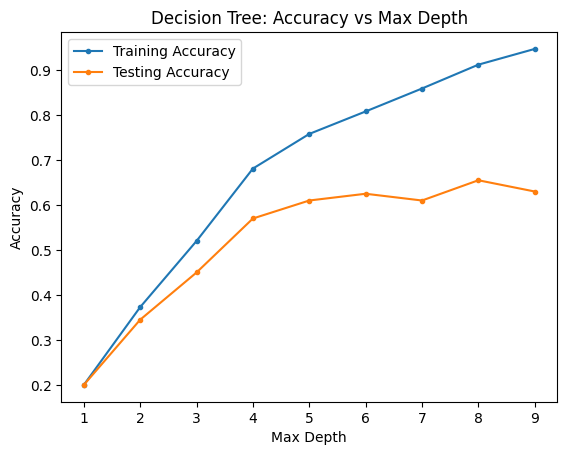

In [311]:
from sklearn.tree import DecisionTreeClassifier
train_acc_dt = []
test_acc_dt  = []
depth_list = range(1, 10)


##########################
## Write your code here ##
for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=336)
    dt.fit(X_train, y_train)
    train_acc = dt.score(X_train,y_train)
    train_acc_dt.append(train_acc)
    test_acc = dt.score(X_test,y_test)
    test_acc_dt.append(test_acc)
##########################


plt.plot(depth_list, train_acc_dt, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_dt, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer: As Max Depth increases, the **training accuracy** increases and eventually approaches 1, the **testing accuracy** increases quickly at first (max_depth from 1 to 4), then it increases slowly (max_depth from 5-7), at last it decreases.

The test accuracy approaches the maximum value at depth 8, after that overfitting occurs.

### Task 2
Write code to train Random Forest Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_rf and test_acc_rf. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

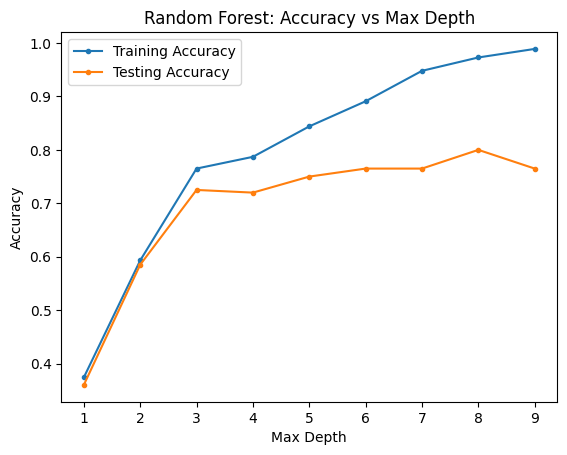

In [312]:
from sklearn.ensemble import RandomForestClassifier
train_acc_rf = []
test_acc_rf  = []
depth_list = range(1, 10)


##########################
## Write your code here ##
for depth in depth_list:
    clf = RandomForestClassifier(max_depth=depth, random_state=336, n_estimators=100)  # 初始化模型
    clf.fit(X_train, y_train)  #train the model
    train_acc_rf.append(clf.score(X_train, y_train))  #calculate and store the accuracy of the training set
    test_acc_rf.append(clf.score(X_test, y_test))  #calculate and store the accuracy of the test set

##########################


plt.plot(depth_list, train_acc_rf, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_rf, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Try to compare this graph with the above one (Decision Tree's graph), and write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:

compared with Decision Tree, Training accuracy of Random Forest rises more stadily and stabilizes below 1.

For decision tree, the testing accuracy peaks at depth=5 and decreases after that; for random forest, testing accuracy is always increasing, faster from depth=1 to 3 and slower from depth=4-9.

The diffrence between testing accuracy and trainiing accuracy of random forest is much smaller than decision tree.

when depth is small. the accuracy of training and testing of random forest is approximately the same. For Decision tree, they have a larger gap at the beginning.

### Task 3
Write code to train **both Bagging and Random Forest** Classification models with different **n_estimators** (=10,20,50,100). Save the accuracy scores of predicting test data for both models respectively in bagging_test_acc and rf_test_acc. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

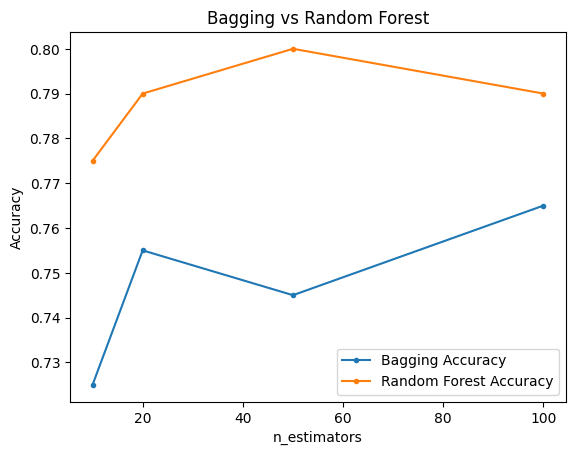

In [313]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
n_estimators_list = [10, 20, 50, 100]
bagging_test_acc = []
rf_test_acc = []


##########################
## Write your code here ##
for n in n_estimators_list:
    bagging = BaggingClassifier(
        n_estimators=n,
        random_state=336
    )
    bagging.fit(X_train,y_train)
    bagging_test_acc.append(bagging.score(X_test,y_test))
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=336
    )
    rf.fit(X_train,y_train)
    rf_test_acc.append(rf.score(X_test,y_test))
##########################


plt.plot(n_estimators_list, bagging_test_acc, marker=".", label='Bagging Accuracy')
plt.plot(n_estimators_list, rf_test_acc, marker=".", label='Random Forest Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Bagging vs Random Forest')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both models. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:

The accuracy of Random Forest is better than Bagging. Generally, both accuracy increase as n increases.

### Task 4
Write code to find the best parameter combination from **\[n_estimators=50/100/200, max_depth=5/10/20/50\]** by 4-fold cross validation. Please use GridSearchCV from sklearn to implement that. Output the best parameter combination and the test accuracy score with the best parameters. <font color=Red>\[TASK\]</font> (6 points)

In [315]:
from sklearn.model_selection import GridSearchCV


##########################
## Write your code here ##
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50]
}
rf = RandomForestClassifier(random_state=336)
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 4,
    n_jobs = -1
)
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test,y_test)
##########################


print("Best params:", grid_search.best_params_)
print("Test Accuracy with Best Model: ", test_accuracy)

Best params: {'max_depth': 20, 'n_estimators': 50}
Test Accuracy with Best Model:  0.8
